# Distributed AutoML task

In [102]:
import pandas as pd
import numpy as np

import torch
import sklearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [103]:
np.random.seed(0)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

ATTRIBUTES_NUM = 53

## Reading datasets

In [104]:
def read_dataset(path):
    dataset = pd.read_csv(path, header=None)
    X = dataset[np.arange(0, ATTRIBUTES_NUM)].to_numpy()
    y = dataset[ATTRIBUTES_NUM].to_numpy()
    
    return X, y

In [105]:
X_train, y_train = read_dataset("../Dataset/Training/Features_Variant_5.csv")
X_test, y_test = read_dataset("../Dataset/Testing/Features_TestSet.csv")

## Learning

In [106]:
def run_cv(model, X, y):
    cv_results = cross_validate(model, X, y, cv=3, return_estimator=True)
    cv_scores = cv_results['test_score']
    max_score_idx = np.argmax(cv_scores)
    max_score = cv_scores[max_score_idx]
    max_model = cv_results['estimator'][max_score_idx]

    return max_model, max_score, scores

## Significant features 

In [107]:
def get_significant_features(model):
    significant_features = np.arange(0, ATTRIBUTES_NUM)[model.coef_ != 0]
    
    return significant_features

In [119]:
def plot_features(model):
    significant_features = get_significant_features(model)
    
    plt.bar(significant_features + 1, np.log10(np.abs(model.coef_[significant_features])))
    plt.xticks(significant_features + 1)
    plt.xlabel("feature")
    plt.ylabel("log10(coefficient)")
    plt.show()

## Ordinary linear regression

Для начала воспользуемся обычной линейной моделью без регуляризации.

In [115]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear, score, _ = run_cv(linear, X_train, y_train)

print(score)

0.3307119222603212


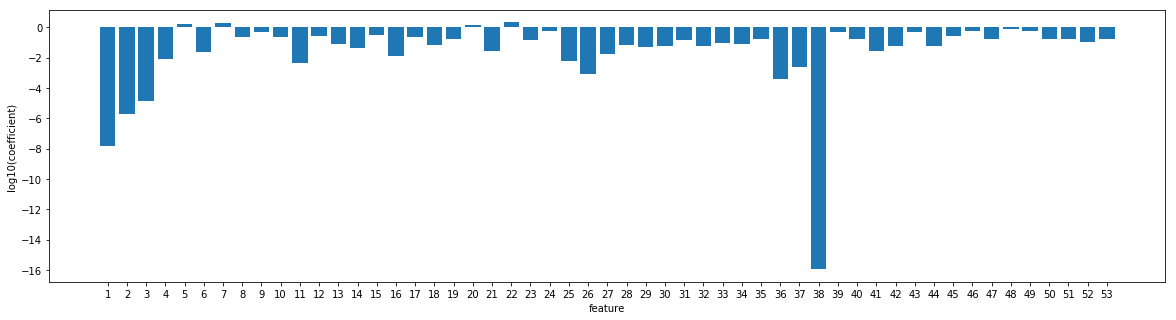

In [120]:
plot_features(linear)

Модель учитывает все признаки. Наибольшие веса имеют признаки, являющиеся статистиками комментариев на странице.

In [117]:
score = linear.score(X_test, y_test)
print(score)

0.1400895232976188


Значение коэффициента R2 далеко даже от 50%.

## Searching the best alpha for regularization 

Попробуем линейную модель с регуляризацией (Lasso) и выберем лучший коэффициент регуляризации.

In [110]:
alphas = np.logspace(-4, 1, 10)
scores = []
max_score = 0
max_score_model = None

for alpha in tqdm(alphas):
    model = Lasso(alpha=alpha, max_iter=1e4, tol=0.1)
    model, score, cv_scores = run_cv(model, X_train, y_train)
    scores.append(score)
    
    if score >= max_score:
        max_score = score
        max_score_model = model
    
    print("alpha: %f, mean score: %f, max score: %f" % (alpha, np.mean(cv_scores), score))
    
print(max_score)

C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.000100, mean score: 0.331514, max score: 0.331514


C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.000359, mean score: 0.331516, max score: 0.331517


C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.001292, mean score: 0.331520, max score: 0.331529


C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.004642, mean score: 0.331536, max score: 0.331582


C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.016681, mean score: 0.331602, max score: 0.331867


C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.059948, mean score: 0.331819, max score: 0.332904


C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.215443, mean score: 0.332551, max score: 0.336947


C:\Users\Vadim\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha: 0.774264, mean score: 0.334777, max score: 0.350355
alpha: 2.782559, mean score: 0.337223, max score: 0.356788
alpha: 10.000000, mean score: 0.339097, max score: 0.355965
0.3567884729648074


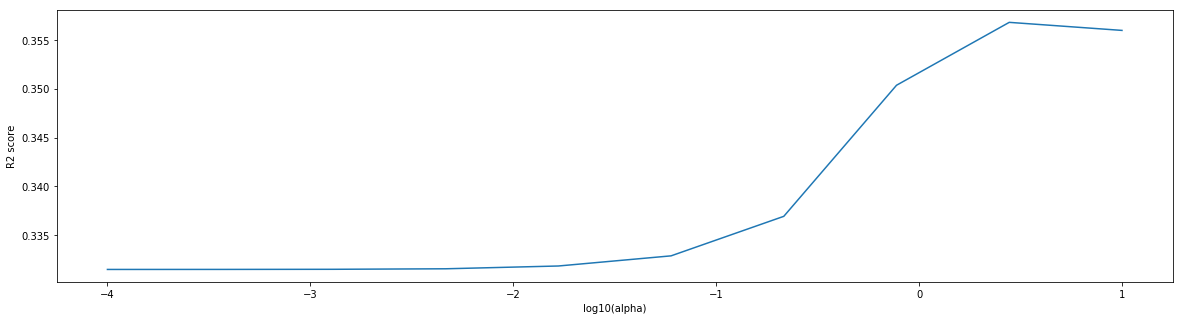

In [111]:
plt.plot(np.log10(alphas), scores)
plt.xlabel("log10(alpha)")
plt.ylabel("R2 score")
plt.show()

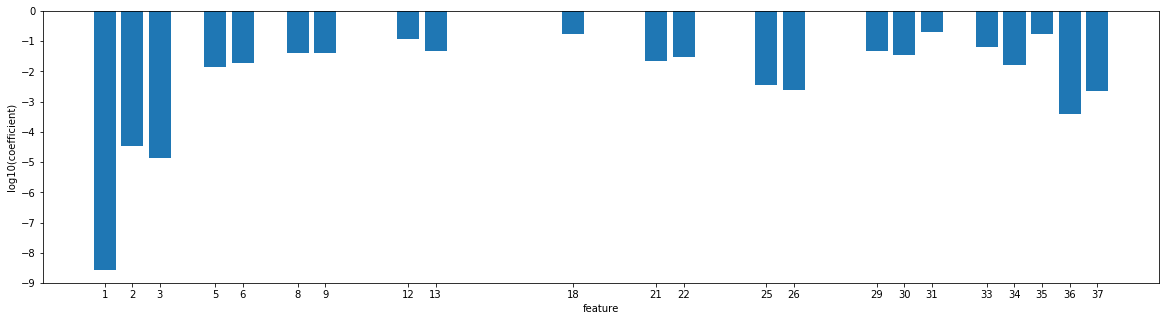

In [121]:
plot_features(max_score_model)

Коэффициент регуляризации выбран достаточно большой, поэтому почти половина признаков в получившейся модели не учитываются.

Среди неучтенных признаков оказались дни недели, в которые был опубликован пост и проведены измерения. Такой результат кажется ожидаемым, потому что, как мне кажется, пользователи в наше время проявляют в целом одинаковую активность в соцсетях независимо от дня недели.

Нулевой коэффициент у таких важных признаков, как категория страницы и время наблюдения, наоборот кажется неестесственным и может быть объяснен недостаточным количеством итераций при обучении и неудачным выбором $\alpha$.

In [114]:
score = max_score_model.score(X_test, y_test)
print(score)

0.14406455173324595


Значение R2 по-прежнему мало (но результат не ухудшился по сравнению с обычной линейной моделью).
Скорее всего, можно было бы достичь результат лучше, увеличив количество итераций в Lasso, но при количестве итераций $10^5$ на моем ноутбуке обучение занимало 18 часов и я не дождался окончания обучения.